# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Your code here. 
x_values = 17, 51, 27, 21, 36, 48, 19, 26, 54, 30
y_values = 10, 1, 5, 9, 4, 2, 9, 6, 0, 3


student_data = pd.DataFrame({'Age': x_values, 'Lateness': y_values})
student_data

,Age,Lateness
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

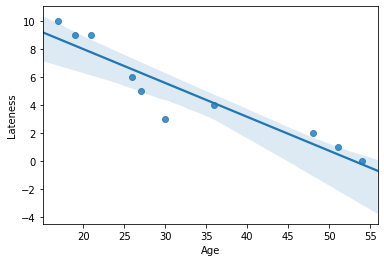

In [3]:
# Your code here.
sns.regplot(x="Age", y="Lateness", data=student_data)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
"""That the older the person the least late he'll be."""

"That the older the person the least late he'll be."

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
np.cov(student_data['Age'], student_data['Lateness'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [6]:
student_data.corr()

,Age,Lateness
Age,1.000000,-0.939163
Lateness,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.

X = pd.DataFrame(student_data['Age'])
y = pd.DataFrame(student_data['Lateness'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [8]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot your regression model on your scatter plot.

In [9]:
# Your code here.
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.2347964]]


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Text(0, 0.5, 'Predicted Y')

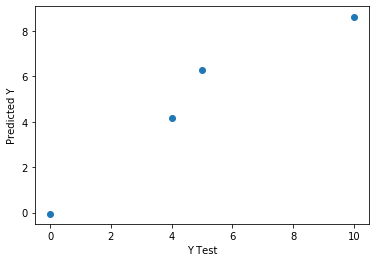

In [10]:
# Your response here. 
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [11]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7195928080380751
MSE: 0.8882806083312063
RMSE: 0.9424863968945155


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 
cars.drop(['Model', 'Engine Displacement', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG'], axis=1, inplace=True)
cars.head()

,Make,Year,Cylinders,Transmission,Fuel Barrels/Year,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,1984,4.0,Automatic 3-spd,19.388824,17,17,522.764706,1950
1,AM General,1984,6.0,Automatic 3-spd,25.354615,13,13,683.615385,2550
2,AM General,1985,4.0,Automatic 3-spd,20.600625,17,16,555.437500,2100
3,AM General,1985,6.0,Automatic 3-spd,25.354615,13,13,683.615385,2550
4,ASC Incorporated,1987,6.0,Automatic 4-spd,20.600625,21,16,555.437500,2550


In [14]:
cars.corr()

,Year,Cylinders,Fuel Barrels/Year,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.267259,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909664,-0.909743,0.986189,0.916208
Highway MPG,0.267259,-0.650287,-0.909664,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.698648,-0.909743,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.851404,-0.875185,0.930865,1.000000


'Fuel Barrels/Year é o que tem a maior crroelação com o CO2 Emissions, and least helpful was year'

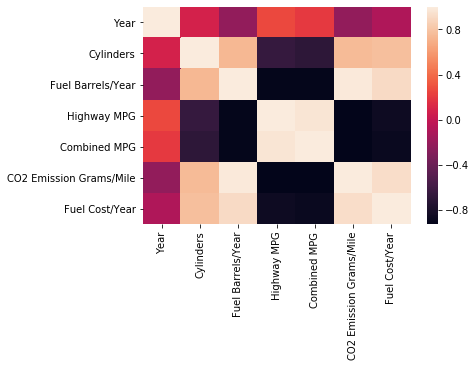

In [15]:
sns.heatmap(cars.corr())

"""Fuel Barrels/Year é o que tem a maior crroelação com o CO2 Emissions, and least helpful was year"""

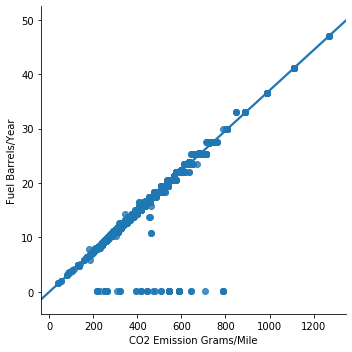

In [16]:
sns.lmplot(x='CO2 Emission Grams/Mile',y='Fuel Barrels/Year', data=cars)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here. 
"""Linear regression"""

y = pd.DataFrame(cars['CO2 Emission Grams/Mile'])
X = pd.DataFrame(cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

Text(0, 0.5, 'Predicted Y')

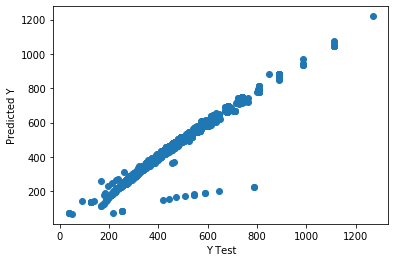

In [20]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.98
R2 no set de teste: 0.98


In [22]:
print(lm.intercept_)

[773.05730956]


In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.32293524  1.89394764 19.12962654 -3.00962096  0.03201504]]


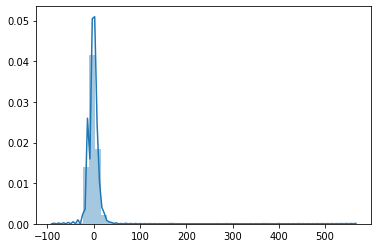

In [24]:
sns.distplot((y_test-predictions),bins=50)

In [25]:
df = pd.DataFrame(y_test)
# df['Actual'] = pd.DataFrame()
df['Pred'] = pd.DataFrame(predictions)
df.head()

,CO2 Emission Grams/Mile,Pred
16975,423.190476,NaN
17341,341.807692,NaN
3441,493.722222,425.298334
5325,467.736842,298.496245
35883,384.000000,NaN


In [26]:
df

,CO2 Emission Grams/Mile,Pred
16975,423.190476,NaN
17341,341.807692,NaN
3441,493.722222,425.298334
5325,467.736842,298.496245
35883,384.000000,NaN
33176,329.148148,NaN
23680,634.785714,NaN
34674,370.291667,NaN
23470,517.000000,NaN
31319,444.350000,NaN


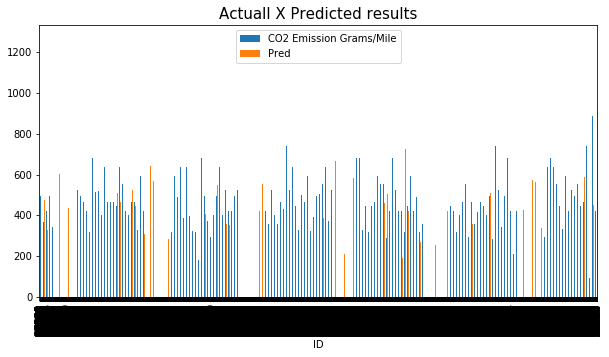

In [27]:
df[['CO2 Emission Grams/Mile', 'Pred']].plot(kind='bar', figsize=(10,5))
plt.title('Actuall X Predicted results', fontsize=15);
plt.xlabel('ID')
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [38]:
# Your code here. 
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

In [41]:
df2 = pd.DataFrame({'X': X, 'Y': Y})
df2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

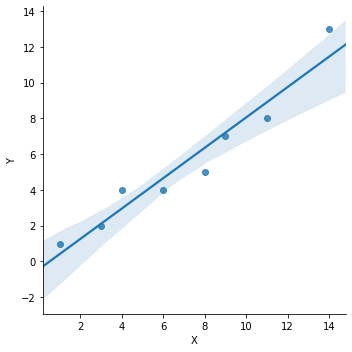

In [42]:
# Your code here.
sns.lmplot(x='X',y='Y', data=df2)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [43]:
# Your response here. 
"""The number of people invited has a positive correlation with the number of people that appeared."""

'The number of people invited has a positive correlation with the number of people that appeared.'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [31]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [32]:
# Your response here. 